# Support Vector Machines (SVM)
 * Initially designed for binary linear classification<br>
 * Maps points onto a hyperplane<br>
 * Divides different points by a clear gap that is as wide as possible<br>
 * Use of support vector clustering to categorize unlabeled data<br>
 * Slow classification times<br>
 * Tried to use Grid Search to fine tune hyperparameters but didn't work out well <br>


### 1 - Import dependencies and read in data

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read CSV file into dataframe
wine_df = pd.read_csv("winedata.csv",index_col=0)
# wine_df.head()

In [3]:
wine_df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [4]:
wine_df.isnull().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [5]:
# normalize columns by removing special characters
cols = wine_df.select_dtypes(include=[np.object]).columns
wine_df[cols] = wine_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
# wine_df

In [6]:
# get top 20 wine varietals from counts
top20 = wine_df['variety'].value_counts().nlargest(20)

In [7]:
# only look at rows with top 20 varietals
wine_df_final =wine_df[wine_df['variety'].isin(top20.index)]

In [ ]:
wine_df_final.head()

In [ ]:
wine_df_final.count()

In [8]:
# drop unneeded columns 
wine_df_final.drop(["taster_name", "taster_twitter_handle","region_2"], axis = 1, inplace = True)


/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


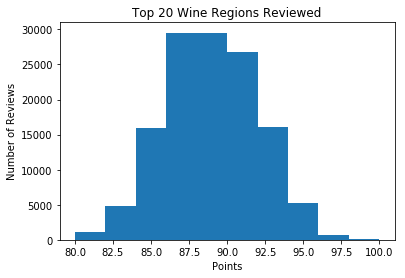

In [31]:
wine_df['points'].plot.hist()
plt.title("Wine Reviews by Points")
plt.xlabel("Points")
plt.ylabel("Number of Reviews")
plt.show()

In [10]:
top20regions = wine_df_final['region_1'].value_counts().nlargest(20)


In [12]:
y = wine_df_final.groupby('region_1').count().reset_index()
y_sorted = y.sort_values(by = 'country',ascending = False)[0:20]



In [13]:
fig = plt.figure(figsize = (9,7))
plt.xticks(rotation=90)
plt.bar(y_sorted["region_1"], y_sorted["country"], align='center', alpha=0.5)
plt.title("Top 20 Wine Regions Reviewed")
plt.xlabel("Region")
plt.ylabel("Number of Reviews")

Text(0,0.5,'Number of Reviews')

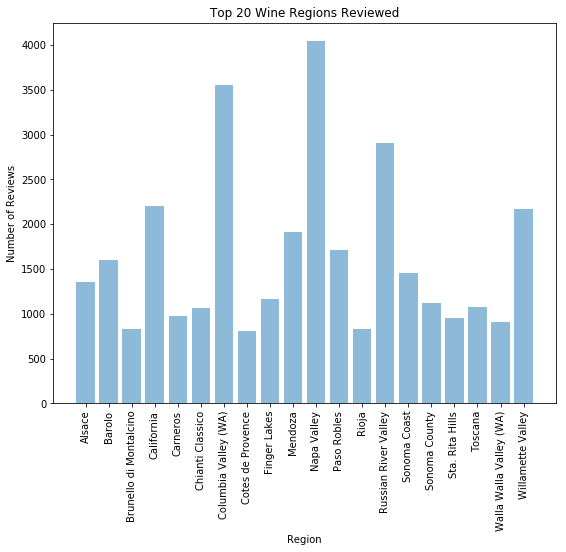

In [14]:
plt.show()

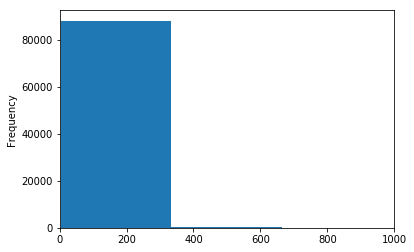

In [15]:
wine_df_final['price'].plot.hist()
plt.xlim([0,1000])
plt.show()

In [16]:
wine_df_final.variety.unique()

array(['White Blend', 'Portuguese Red', 'Pinot Gris', 'Riesling',
       'Pinot Noir', 'Cabernet Sauvignon', 'Chardonnay', 'Malbec',
       'Red Blend', 'Merlot', 'Sauvignon Blanc', 'Sangiovese',
       'Bordeaux-style Red Blend', 'Rose', 'Zinfandel', 'Syrah',
       'Nebbiolo', 'Rhone-style Red Blend', 'Sparkling Blend',
       'Tempranillo'], dtype=object)

In [18]:
# drop unneeded columns 
wine_df_final.drop(["country", "designation","points", "price", "province", "region_1", "title","winery" ], axis = 1, inplace = True)

/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
wine_df_final.head()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


In [20]:
# create vectors and classify
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import text


/Users/andrea/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
le = LabelEncoder()
y = le.fit_transform(wine_df_final['variety'])

In [22]:
stopwords = text.ENGLISH_STOP_WORDS

In [23]:
wine_stopwords = []
for variety in wine_df_final['variety'].unique():
    for word in variety.split(' '):
        wine_stopwords.append(word.lower())
# wine_stop_words = pd.Series(data=wine_stop_words).unique()

In [24]:
wine_stopwords

['white',
 'blend',
 'portuguese',
 'red',
 'pinot',
 'gris',
 'riesling',
 'pinot',
 'noir',
 'cabernet',
 'sauvignon',
 'chardonnay',
 'malbec',
 'red',
 'blend',
 'merlot',
 'sauvignon',
 'blanc',
 'sangiovese',
 'bordeaux-style',
 'red',
 'blend',
 'rose',
 'zinfandel',
 'syrah',
 'nebbiolo',
 'rhone-style',
 'red',
 'blend',
 'sparkling',
 'blend',
 'tempranillo']

In [25]:
wine_stopwords.append(stopwords)

In [26]:
# term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collections

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression


In [27]:
#Use the Tfidf Vectorizer to figure out the importance of the words that make up the descriptions given
vect = TfidfVectorizer(stop_words= wine_stopwords)
X = vect.fit_transform(wine_df_final['description'])

In [28]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

In [29]:
# Support vector machine classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=le.classes_))

                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.67      0.76      0.71      2061
      Cabernet Sauvignon       0.53      0.70      0.60      2846
              Chardonnay       0.71      0.89      0.79      3554
                  Malbec       0.43      0.36      0.39       797
                  Merlot       0.35      0.11      0.16       918
                Nebbiolo       0.78      0.77      0.77       867
              Pinot Gris       0.68      0.27      0.39       443
              Pinot Noir       0.68      0.81      0.74      4014
          Portuguese Red       0.75      0.65      0.69       757
               Red Blend       0.61      0.60      0.60      2631
   Rhone-style Red Blend       0.75      0.55      0.64       434
                Riesling       0.80      0.81      0.80      1535
                    Rose       0.75      0.73      0.74      1019
              Sangiovese       0.65      0.44      0.53       832
         

In [32]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.666


In [ ]:
from sklearn.externals import joblib
joblib.dump(model, 'svm_wine.pkl')